# Personalized Recommendation System for Solaria Food Menu Based on Customer Ratings Using *Singular Value Decomposition*
---
Group Project for the Mathematical Computing Applications Course | IPB University | 2024

## Import Package

In [1]:
using CSV, DataFrames, LinearAlgebra, Plots, BenchmarkTools, Dates, ColorSchemes, Random

## Import Data

In [2]:
df = CSV.read("../data/Data Rating Makanan Solaria.csv", DataFrame)

Row,user_id,food_id,rating
,Int64,Int64,Int64
1,1,1,0
2,1,2,0
3,1,3,0
4,1,4,4
5,1,5,0
6,1,6,5
7,1,7,0
8,1,8,0
9,1,9,0


_*0 rating means missing entry_

In [3]:
menu = CSV.read("../data/Data Menu Makanan Solaria.csv", DataFrame)

Row,id,name
,Int64,String31
1,1,Mie Goreng Sapi
2,2,Nasi Goreng Bebek Cabe Ijo
3,3,Mie Ayam Spesial Solaria Pedas
4,4,Fuyunghai
5,5,Ifumie
6,6,Kwetiau Goreng Seafood
7,7,Bihun Ayam
8,8,Nasi Sapo Tahu
9,9,Nasi Ayam Teriyaki


## Data Summary

In [4]:
size(df) #dataframe size

(3060, 3)

In [5]:
names(df) #dataframe column names

3-element Vector{String}:
 "user_id"
 "food_id"
 "rating"

In [6]:
length(unique(df[:,1])) #customer quantity

153

In [7]:
length(unique(df[:,2])) #menu quantity

20

In [8]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Int64,Float64,Int64,Int64,DataType
1,user_id,77.0,1,77.0,153,0,Int64
2,food_id,10.5,1,10.5,20,0,Int64
3,rating,2.63039,0,3.0,5,0,Int64


## Matrix that will be used for SVD

In [9]:
m, n = 153, 20 #total number of customers and menus
matrix = zeros(Float64, m, n); #the missing entries will be set to 0
for i in 1:3060
    matrix[df.user_id[i],df.food_id[i]]=df.rating[i] #filling the observed entries
end
matrix

153×20 Matrix{Float64}:
 0.0  0.0  0.0  4.0  0.0  5.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  5.0
 0.0  0.0  0.0  2.0  5.0  4.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  5.0
 5.0  0.0  0.0  5.0  4.0  5.0  0.0  0.0     0.0  0.0  0.0  0.0  5.0  0.0  0.0
 0.0  5.0  0.0  4.0  0.0  4.0  0.0  0.0     0.0  0.0  0.0  5.0  0.0  0.0  4.0
 5.0  4.0  0.0  0.0  0.0  0.0  4.0  0.0     0.0  0.0  0.0  0.0  4.0  4.0  4.0
 5.0  4.0  4.0  0.0  0.0  0.0  0.0  5.0  …  0.0  0.0  5.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  3.0  2.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  5.0  5.0  4.0  3.0  4.0  3.0  5.0     4.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  4.0  5.0  3.0  3.0  3.0     3.0  5.0  3.0  3.0  3.0  4.0  5.0
 4.0  4.0  4.0  4.0  4.0  3.0  5.0  4.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  3.0  4.0  0.0  0.0  4.0  4.0  0.0     0.0  0.0  4.0  0.0  0.0  0.0  4.0
 4.0  0.0  4.0  0.0  4.0  0.0  0.0  0.0 

In [10]:
matrix = unique(matrix,dims=1) #deleting duplicates data

145×20 Matrix{Float64}:
 0.0  0.0  0.0  4.0  0.0  5.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  5.0
 0.0  0.0  0.0  2.0  5.0  4.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  5.0
 5.0  0.0  0.0  5.0  4.0  5.0  0.0  0.0     0.0  0.0  0.0  0.0  5.0  0.0  0.0
 0.0  5.0  0.0  4.0  0.0  4.0  0.0  0.0     0.0  0.0  0.0  5.0  0.0  0.0  4.0
 5.0  4.0  0.0  0.0  0.0  0.0  4.0  0.0     0.0  0.0  0.0  0.0  4.0  4.0  4.0
 5.0  4.0  4.0  0.0  0.0  0.0  0.0  5.0  …  0.0  0.0  5.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  3.0  2.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  5.0  5.0  4.0  3.0  4.0  3.0  5.0     4.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  4.0  5.0  3.0  3.0  3.0     3.0  5.0  3.0  3.0  3.0  4.0  5.0
 4.0  4.0  4.0  4.0  4.0  3.0  5.0  4.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  3.0  4.0  0.0  0.0  4.0  4.0  0.0     0.0  0.0  4.0  0.0  0.0  0.0  4.0
 4.0  0.0  4.0  0.0  4.0  0.0  0.0  0.0 

## SVD Modeling

The steps are:
1. Construct an $m\times n$ matrix containing the ratings of each menu item purchased by each user ID.
2. Determine the number of factors (the number of principal components to be reconstructed) and perform the SVD decomposition of the matrix.
3. Reconstruct the estimated matrix using $U$ matrix of size $m$ $\times$ factors, $\Sigma$ matrix of size factors $×$ factors, and the transpose of $V$ matrix of size factors $\times$ $V$.
4. Evaluate the estimation error by calculating the MAPE using the following formula:
$$
\frac{\text{norm}(A_i - A_{i+1})}{\text{norm}A_i}
$$
where $A_i$ is the matrix at iteration $i$ for $i=0,1,2,....$ 
5. Check whether the error is sufficiently small (i.e., if it meets the threshold 𝜀 = 0.001). 
6. If the error does not meet the criterion, repeat the reconstruction using the updated estimated matrix from the previous iteration. 
7. Generate recommendations for an individual user by: 
- Taking the corresponding row in the predicted rating matrix, 
- Sorting the predicted values in descending order, 
- Selecting the top 5 items with the highest predicted ratings as the most 
recommended menus for that user.
8. Furthermore, apply the trained model to predict ratings for new customers, allowing the system to generate personalized recommendations even for users who were not included in the original datasets.

In [11]:
ind = matrix .== 0 ; #matrix mask that marks missing entries with 1 and non-missing entries with 0

In [12]:
function svd_matrix(matrix::AbstractMatrix{T}, ind, factor::Int64, e::Float64, max_iter::Int) where T
    #initiate values
    epsilon = 100
    iter = 0
    mape = []
    u = s = v = nothing

    while iter <= max_iter && epsilon >= e
        u,s,v = svd(matrix) #run svd
        remat = u[:,1:factor]*Diagonal(s[1:factor])*v[:,1:factor]' #prediction matrix

        matrix2 = copy(matrix)
        matrix2[ind] = remat[ind] #fill only the missing value of the matrix

        #check the error criterion
        if iter>0
            epsilon = norm(matrix2[ind]-matrix[ind])/norm(matrix[ind])
            if mod(iter,50)==0
                println("iter=$iter, mape = $epsilon")
            end
            push!(mape,epsilon)
        end
        matrix = copy(matrix2)
        iter += 1
    end
    
    return (matrix, epsilon, iter, mape, u, s, v)
    
end

svd_matrix (generic function with 1 method)

In [13]:
# Iteration process 

# initiate error criterion and maximum iteration
e = 0.001
iter = 1000;

results = [];
factor_list = 2:19

for factor in factor_list
    println("Factor $factor:")
    start_time = now()  # Iteration time start counting
    matrixResult, error, totalIter, mape, u, s, v = svd_matrix(matrix, ind, factor, e, iter) #run the svd function
    end_time = now()  # Iteration time stop
    elapsed_time = (end_time - start_time).value / 1e9  # Konversi ke detik
    
    #make a list for plotting in the next section
    mapeList = fill(e,iter)
    mapeList[1:totalIter-1] = mape
    push!(results, (matrixResult, factor, error, totalIter, mapeList, elapsed_time, u, s, v))
end

Factor 2:
iter=50, mape = 0.0024373722942363017
iter=100, mape = 0.0021172582729581
Factor 3:
iter=50, mape = 0.006557387454109709
iter=100, mape = 0.0012532047627835617
Factor 4:
iter=50, mape = 0.003550802800196739
iter=100, mape = 0.0012103784282662072
Factor 5:
iter=50, mape = 0.011424801757245293
iter=100, mape = 0.0025168800053931395
iter=150, mape = 0.0014753594433478971
Factor 6:
iter=50, mape = 0.008447175852975828
iter=100, mape = 0.004034615325643933
iter=150, mape = 0.0027307990979578
iter=200, mape = 0.0019302371797671166
iter=250, mape = 0.0011393312174832102
Factor 7:
iter=50, mape = 0.008635962398693308
iter=100, mape = 0.00297644570009652
iter=150, mape = 0.0017199518367668164
iter=200, mape = 0.0010810895168257726
Factor 8:
iter=50, mape = 0.007940112005719802
iter=100, mape = 0.0033613774801895435
iter=150, mape = 0.0022059666593167693
iter=200, mape = 0.001326422093426293
Factor 9:
iter=50, mape = 0.0064179315428895605
iter=100, mape = 0.0027918397551306815
iter=150

In [14]:
df2 = DataFrame(Factor = [r[2] for r in results],
               Iter_Total = [r[4] for r in results],
               MAPE = [r[3] for r in results],
               Time_s = [r[6] for r in results])

println(df2)

18×4 DataFrame
 Row │ Factor  Iter_Total  MAPE         Time_s   
     │ Int64   Int64       Float64      Float64  
─────┼───────────────────────────────────────────
   1 │      2         132  0.00097513   1.245e-6
   2 │      3         107  0.000966545  8.9e-8
   3 │      4         130  0.000997121  3.8e-8
   4 │      5         182  0.00099654   3.2e-8
   5 │      6         262  0.000989606  4.9e-8
   6 │      7         214  0.000999675  3.6e-8
   7 │      8         242  0.000997116  3.7e-8
   8 │      9         273  0.000998816  3.7e-8
   9 │     10         338  0.000999209  4.7e-8
  10 │     11         485  0.000994635  6.5e-8
  11 │     12         331  0.000993079  5.2e-8
  12 │     13         255  0.000995218  3.9e-8
  13 │     14         234  0.00099446   5.3e-8
  14 │     15         280  0.000999068  5.2e-8
  15 │     16         248  0.00099986   4.1e-8
  16 │     17         242  0.00099469   4.1e-8
  17 │     18         739  0.000998087  1.16e-7
  18 │     19         654  0.0009

## MAPE Plot

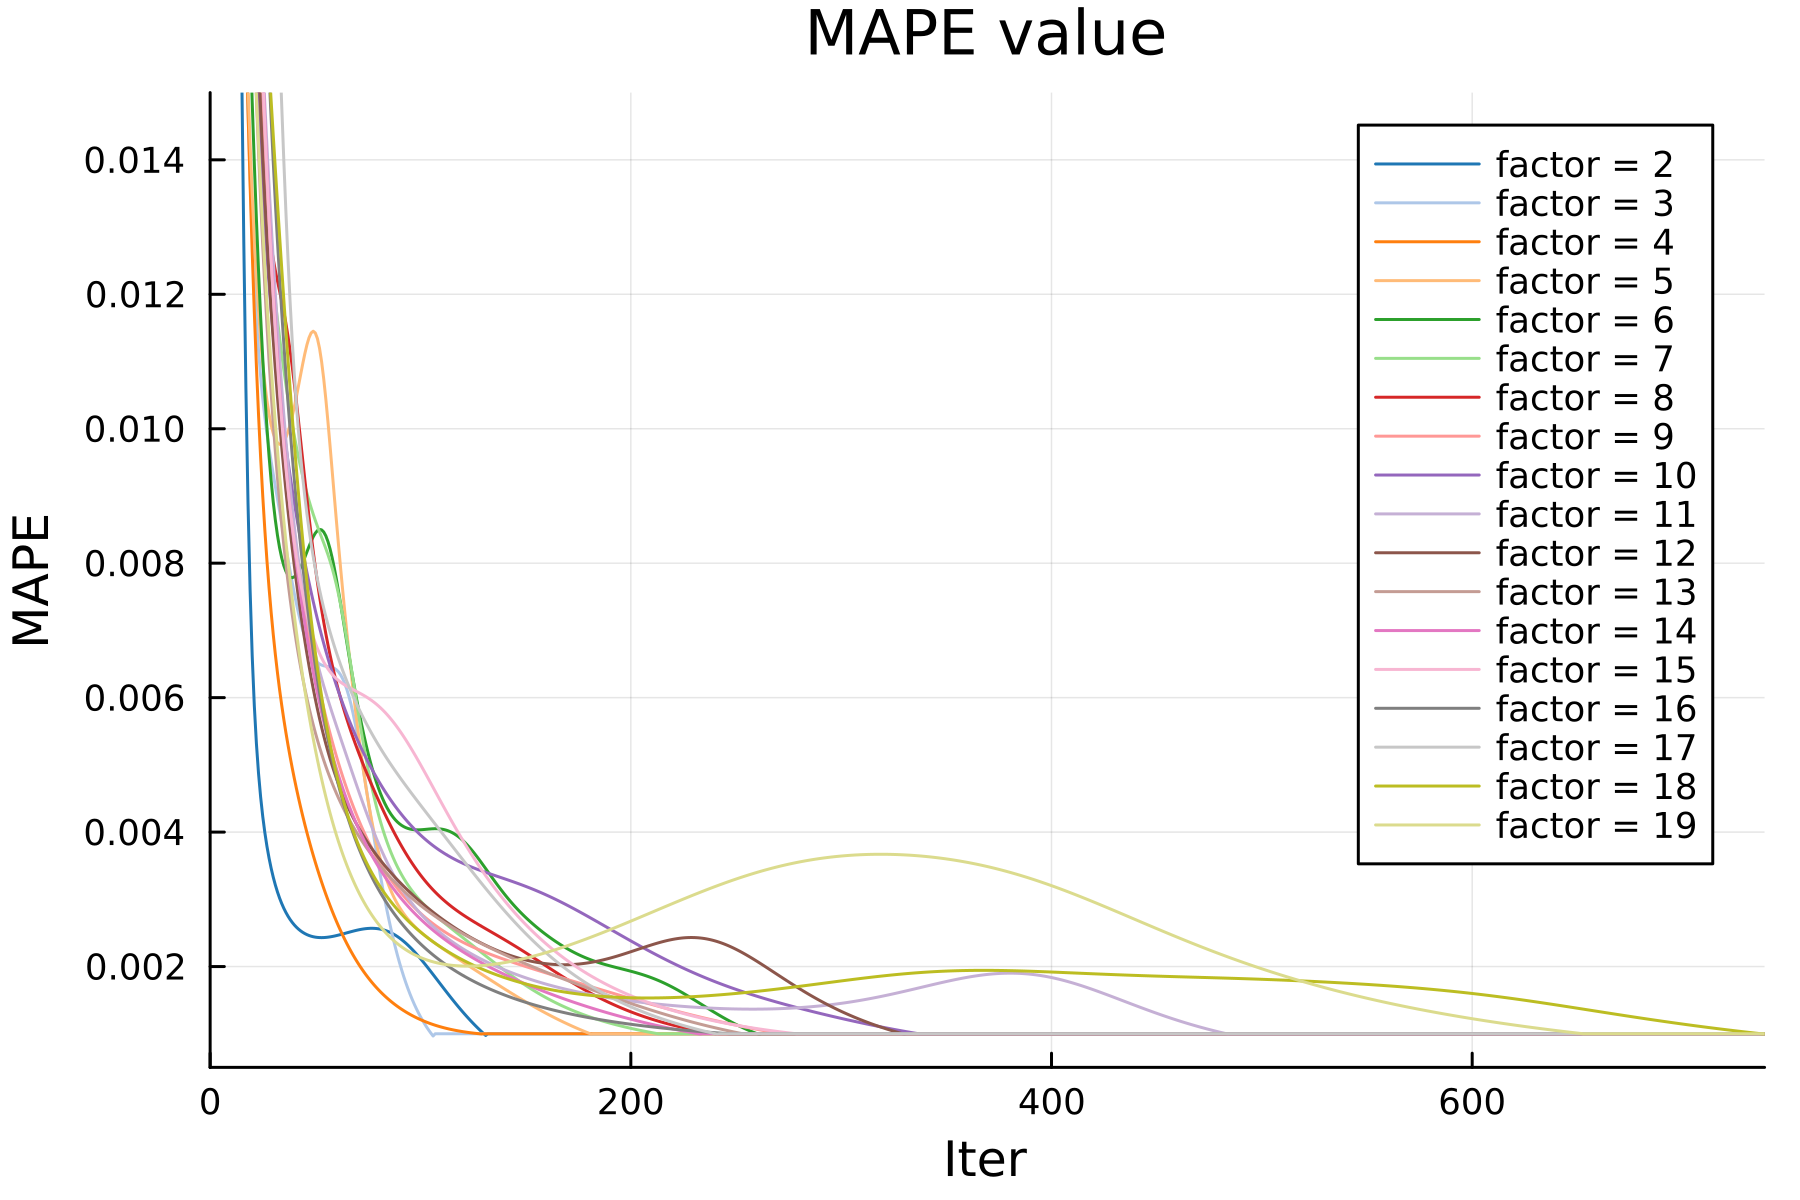

In [15]:
colors = palette(:tab20)

pl = plot(results[1][5], label = "factor = 2", color = colors[1],
     title = "MAPE value", xlabel = "Iter", ylabel = "MAPE",
     xlim = (0,739), ylim = (0.0005,0.015), dpi = 300)

for (i, k) in enumerate(3:19)
    plot!(results[k-1][5], label = "factor = $k", color = colors[i+1])
end

display(pl)

## Choosing the most stable factor

A factor $k$ is deemed stable if the top-5 recommendations produced by the model with $k+1$ factors are most similar to those produced by the model with $k$ factors. For reliable comparison, the analysis is restricted to users who have at least 6 unrated menu items.

In [16]:
menuName = menu.name;

In [17]:
#list of SVD matrices results for each factors
matrices = [results[i][1] for i in 1:18];

In [18]:
# make a list of users IDs who have at least 6 unrated menu items
list = (sum(matrix .== 0,dims = 2)) .>= 6   
listtest = []
for i = 1:n
    if list[i]==1
        push!(listtest,i)
    end
end

In [19]:
# define a func to find how many in top-5 recommendation are match between 2 distinct factors, output given as percentage
function similarity(ID::Int, matrix1, matrix2, menuName, ind)
    boa = DataFrame(weight = matrix1[ID,ind[ID,:]] , menu = menuName[ind[ID,:]])
    recom1 = sort(boa, :weight, rev = true)

    boa = DataFrame(weight = matrix2[ID,ind[ID,:]] , menu = menuName[ind[ID,:]])
    recom2 = sort(boa, :weight, rev = true)
    
    res = length(intersect(recom1.menu[1:5],recom2.menu[1:5])) / 5
    
    return res
end

similarity (generic function with 1 method)

In [20]:
# a func to calculate the similarity percentage of all factors
function similarity_all(listtest, matrices, menuName, ind)
   
    # a DataFrame to restore the similarity value
    res = DataFrame(Factor_1 = Int[], Factor_2 = Int[], Similarity_Percentage = Float64[])

    # similarity calculation between each factors
    for i in 1:(length(matrices) - 1)
        accur = 0

        for id in listtest
            accur += similarity(id, matrices[i], matrices[i + 1], menuName, ind)
        end

        mean_sim = (accur / length(listtest)) * 100    # mean of similarity value 

        # push to the DataFrame
        push!(res, (Factor_1 = i + 1, Factor_2 = i + 2, Similarity_Percentage = mean_sim))
    end

    return res
end

similarity_all (generic function with 1 method)

In [21]:
result = similarity_all(listtest, matrices, menuName, ind)
println(result)

17×3 DataFrame
 Row │ Factor_1  Factor_2  Similarity_Percentage 
     │ Int64     Int64     Float64               
─────┼───────────────────────────────────────────
   1 │        2         3                65.7143
   2 │        3         4                61.4286
   3 │        4         5                67.1429
   4 │        5         6                75.7143
   5 │        6         7                68.5714
   6 │        7         8                62.8571
   7 │        8         9                65.7143
   8 │        9        10                58.5714
   9 │       10        11                67.1429
  10 │       11        12                75.7143
  11 │       12        13                67.1429
  12 │       13        14                74.2857
  13 │       14        15                72.8571
  14 │       15        16                58.5714
  15 │       16        17                68.5714
  16 │       17        18                67.1429
  17 │       18        19                50.0


This table shows the most stable factor is **5** and **11** with similarity percentage $75.7143\%$

## SVD Recommendation

Here are some examples of top-5 new menu recommendations for customers.

In [22]:
factor = 5;

In [23]:
# for customer ID 4
ID = 4
boa = DataFrame(weight = results[factor-1][1][ID,ind[ID,:]] , menu = menuName[ind[ID,:]])
recom = sort(boa, :weight, rev = true)
recom.menu[1:min(5,length(recom.menu))]

5-element Vector{String31}:
 "Chicken Cordon Bleu"
 "Capcay Ayam"
 "Nasi Goreng Kambing"
 "Mie Kuah Ayam"
 "Bihun Ayam"

In [24]:
# for customer ID 119
ID = 119
boa = DataFrame(weight = results[factor-1][1][ID,ind[ID,:]] , menu = menuName[ind[ID,:]])
recom = sort(boa, :weight, rev = true)
recom.menu[1:min(5,length(recom.menu))]

5-element Vector{String31}:
 "Nasi Ayam Teriyaki"
 "Nasi Goreng Ayam"
 "Kwetiau Goreng Seafood"
 "Nasi Goreng Seafood"
 "Mie Ayam Pangsit Rebus"

*If the recommendation shows nothing, it means the customer has rated each menu.

## Menu recommendation for new customer using trained model

In [25]:
function fold_in_row(U, S, V, factor, newrow; λ=0.0)
    # take truncated factors
    v_k = V[:, 1:factor]
    s_k = Diagonal(S[1:factor])

    # indices of observed ratings
    obs_ind = findall(newrow .!= 0)
    if isempty(obs_ind)
        error("No observed entries in new row, can't fold in.")
    end

    # build the small matrix A_ls (k × m_obs) for least squares:
    # r_obs ≈ u_new * (Σ_k * V_k'[:, obs])
    a_ls = s_k * (v_k')[:, obs_ind]
    row_obs = newrow[obs_ind]

    # Solve for u_new (1 × k) via least squares on transposed system:
    # A_ls' * u_new' ≈ r_obs'
    # use ridge regularization if ill-conditioned: (A_ls'*A_ls + λ I) u_new' = A_ls' * r_obs'
    if λ == 0.0
        u_new_t = a_ls' \ row_obs         # solves least squares
    else
        kdim = size(a_ls, 1)
        m = a_ls * a_ls' + λ * I(kdim)
        u_new_t = m \ (a_ls * row_obs)
    end
    u_new = u_new_t'

    # predicted full row (including changing the observed one)
    pred_full = (u_new * s_k * v_k')

    # make the prediction doesn't change the observed one (only the missing ratings)
    miss_ind = findall(newrow .== 0)
    pred = copy(Float64.(newrow))
    pred[miss_ind] .= pred_full[miss_ind]
    
    return pred
end

fold_in_row (generic function with 1 method)

### Usage example

In [26]:
# Chosen model
factor = 5;
u = results[factor-1][7];
s = results[factor-1][8];
v = results[factor-1][9];

In [27]:
# generate a random user ratings
Random.seed!(1234)
rating = zeros(Int64,20)
for i in 1:20
    rating[i] = rand(0:1) * rand(1:5)
end

In [28]:
# Predict the missing ratings
prediction = fold_in_row(u, s, v, factor, rating; λ=0)
df2 = DataFrame(Menu = menuName, User_Rating = rating, Prediction_float = prediction, Prediction = clamp.(round.(Int,prediction), 1, 5))
println(df2[:,[1,2,4]])

# top-5 menu recommendation
recomm = sort(df2, :Prediction_float, rev = true)
recomm.Menu[1:5]

20×3 DataFrame
 Row │ Menu                            User_Rating  Prediction 
     │ String31                        Int64        Int64      
─────┼─────────────────────────────────────────────────────────
   1 │ Mie Goreng Sapi                           0           3
   2 │ Nasi Goreng Bebek Cabe Ijo                0           3
   3 │ Mie Ayam Spesial Solaria Pedas            0           3
   4 │ Fuyunghai                                 4           4
   5 │ Ifumie                                    0           3
   6 │ Kwetiau Goreng Seafood                    4           4
   7 │ Bihun Ayam                                0           2
   8 │ Nasi Sapo Tahu                            0           3
   9 │ Nasi Ayam Teriyaki                        4           4
  10 │ Chicken Mozzarella                        4           4
  11 │ Capcay Ayam                               0           3
  12 │ Chicken Cordon Bleu                       2           2
  13 │ Nasi Goreng Seafood           

5-element Vector{String31}:
 "Fuyunghai"
 "Kwetiau Goreng Seafood"
 "Nasi Ayam Teriyaki"
 "Chicken Mozzarella"
 "Chicken Steak Chessy"